In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import tensorflow as tf
import keras

In [163]:
df = pd.read_csv('../data/heart_failure_clinical_records_dataset.csv')

In [164]:
df.shape

(299, 13)

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [89]:
### Part 2  lets create aritficial intrllegence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout

In [129]:
classifier = Sequential()
classifier.add(Dense(units=12,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dense(units=6,activation='relu'))
# classifier.add(Dense(units=6,activation='relu'))
# classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid')) 

In [130]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [131]:
## Early stoping
# Stop training when a monitored metric has stopped improving.
# patience: Number of epochs with no improvement after which training will be stopped.
early_stoping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
#     start_from_epoch=0,
)

In [132]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stoping)

Epoch 1/100
15/15 [==============================] - 1s 19ms/step - loss: 0.7141 - accuracy: 0.3733 - val_loss: 0.6923 - val_accuracy: 0.4865
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6997 - accuracy: 0.4933 - val_loss: 0.6866 - val_accuracy: 0.5405
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.5400 - val_loss: 0.6824 - val_accuracy: 0.6486
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6854 - accuracy: 0.6133 - val_loss: 0.6794 - val_accuracy: 0.6216
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6767 - accuracy: 0.6600 - val_loss: 0.6762 - val_accuracy: 0.6892
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6653 - accuracy: 0.7400 - val_loss: 0.6732 - val_accuracy: 0.7162
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6629 - accuracy: 0.7600 - val_loss: 0.6701 - val_accuracy: 0.7162
Epoch 8/100


Epoch 59/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3047 - accuracy: 0.8867 - val_loss: 0.4946 - val_accuracy: 0.7973
Epoch 60/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3006 - accuracy: 0.8867 - val_loss: 0.4902 - val_accuracy: 0.8108
Epoch 61/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3074 - accuracy: 0.8667 - val_loss: 0.4881 - val_accuracy: 0.8108
Epoch 62/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2970 - accuracy: 0.8667 - val_loss: 0.4867 - val_accuracy: 0.8108
Epoch 63/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2773 - accuracy: 0.8733 - val_loss: 0.4874 - val_accuracy: 0.8108
Epoch 64/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3165 - accuracy: 0.8467 - val_loss: 0.4858 - val_accuracy: 0.8108
Epoch 65/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3207 - accuracy: 0.8733 - val_loss: 0.4871 - val_accuracy: 0.8108
Epoch 

In [133]:
model_history.history.keys() 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

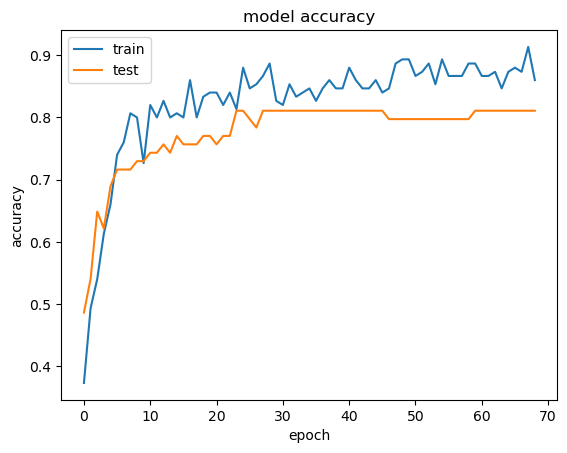

In [134]:
plt.plot(model_history.history[ 'accuracy'])
plt.plot(model_history.history[ 'val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

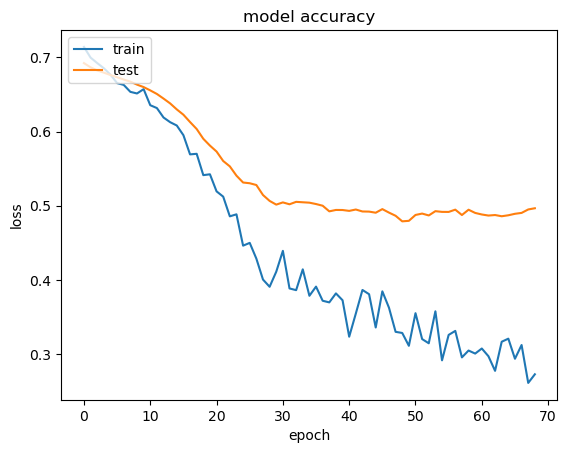

In [140]:
plt.plot(model_history.history[ 'loss'])
plt.plot(model_history.history[ 'val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [145]:
ann = classifier
# predicting teh test set results
y_pred = ann.predict(X_test)
# print(y_pred)
y_pred = (y_pred > 0.5)
#print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3/3 [==============================] - 0s 10ms/step
[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]]


Accuracy : 0.7733333333333333
Confusion Matrix : 



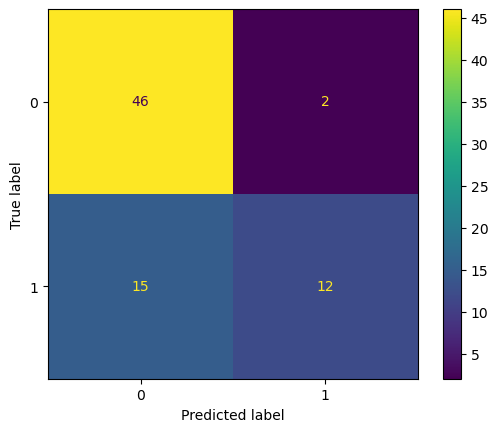

In [168]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
 
cm = confusion_matrix(y_test, y_pred)
print('Accuracy :',accuracy_score(y_test, y_pred))
# print(accuracy_score(y_test, y_pred))
print('Confusion Matrix : \n')
conf_matrix1 = ConfusionMatrixDisplay(confusion_matrix=cm)
conf_matrix1.plot()

In [137]:
pred_Ann = ann.predict(X_test)
pred_Ann= (pred_Ann > 0.5)
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, pred_Ann)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity1 : ', specificity1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity1)

from sklearn.metrics import matthews_corrcoef

print("MCC : ",matthews_corrcoef(y_test,pred_Ann))

from sklearn.metrics import roc_auc_score

print("AUC : ",roc_auc_score(y_test,pred_Ann))

from sklearn.metrics import classification_report

print(classification_report(y_test, pred_Ann))

3/3 [==============================] - 0s 2ms/step
Confusion Matrix : 
 [[46  2]
 [15 12]]
Accuracy :  0.7733333333333333
specificity1 :  0.9583333333333334
Sensitivity :  0.4444444444444444
MCC :  0.4961797853511374
AUC :  0.701388888888889
              precision    recall  f1-score   support

           0       0.75      0.96      0.84        48
           1       0.86      0.44      0.59        27

    accuracy                           0.77        75
   macro avg       0.81      0.70      0.71        75
weighted avg       0.79      0.77      0.75        75



In [138]:
# Confusion Matrix : 
# [[46  2]
#  [15 12]]
TP3 = 46
FP3 = 2
FN3 = 15
TN3 = 12


def fun1(TP,FN,FP,TN):
    
    print("SVM on PIDDD ---------------------->")
    print("TP",TP)
    print("FN",FN)
    print("FP",FP)
    print("TN", TN)
    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    print("Accuracy : {}".format(Accuracy))
    Precision = TP / (TP + FP)
    print("Precision : {}".format(Precision))
    Recall = TP / (TP + FN)
    print("Recall : {} ".format(Recall))
    F1_score = 2*(Precision*Recall)/(Precision + Recall)
    print("F1_score : {}".format(F1_score))
    TPR = TP / (TP + FP)
    print("TPR : {}".format(TPR))
    FPR = FP / (FP + TN)
    print("FPR : {}".format(FPR))

In [139]:
fun1(TP3,FN3,FP3,TN3)

SVM on PIDDD ---------------------->
TP 46
FN 15
FP 2
TN 12
Accuracy : 0.7733333333333333
Precision : 0.9583333333333334
Recall : 0.7540983606557377 
F1_score : 0.8440366972477064
TPR : 0.9583333333333334
FPR : 0.14285714285714285


In [146]:
 ann.predict(X_test)

3/3 [==============================] - 5s 95ms/step


array([[0.0112975 ],
       [0.04386633],
       [0.5684958 ],
       [0.03846083],
       [0.08359502],
       [0.0493391 ],
       [0.63244534],
       [0.02702284],
       [0.7347143 ],
       [0.10204867],
       [0.09153318],
       [0.93818605],
       [0.2732453 ],
       [0.06248297],
       [0.5588429 ],
       [0.8060971 ],
       [0.01705206],
       [0.13704386],
       [0.03478429],
       [0.06377322],
       [0.31332746],
       [0.05671357],
       [0.34501886],
       [0.09642762],
       [0.23249187],
       [0.04100478],
       [0.09882023],
       [0.02903989],
       [0.0634    ],
       [0.03634946],
       [0.03077224],
       [0.846107  ],
       [0.25301012],
       [0.08105415],
       [0.08966552],
       [0.52777   ],
       [0.11150289],
       [0.14425828],
       [0.0228937 ],
       [0.9378799 ],
       [0.01600631],
       [0.13008882],
       [0.11821679],
       [0.24932401],
       [0.8608838 ],
       [0.08318147],
       [0.0364649 ],
       [0.020

In [148]:
import pickle

In [155]:
pickle.dump(ann, open('../PICKEL/ANNmodel.pkl','wb'))

INFO:tensorflow:Assets written to: ram://0873933b-8330-45f1-9e72-78a0429dce44/assets


In [169]:
# # Loading model to compare the results
# modelANN = pickle.load(open('../PICKEL/ANNmodel.pkl','rb'))

In [ ]:
modelANN.predict(X_test)

In [158]:
# serialize weights to HDF5
ann.save_weights("../PICKEL/model.h5")
print("Saved model to disk")

Saved model to disk


In [170]:
# # load weights into new model
# loaded_model.load_weights("../PICKEL/model.h5")
# print("Loaded model from disk")